<a href="https://colab.research.google.com/github/kdmwangi/Data-Science/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

In [2]:
dataset = pd.read_csv('IRIS.csv')

# Data Exploration

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.shape

(150, 5)

In [7]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
dataset.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [20]:
dataset['species'].value_counts()
# can tell that its evenly balanced dataset

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Cleaning

In [9]:
dataset.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [12]:
dataset.duplicated().sum()

3

In [14]:
# drop duplicates
clean_data = dataset.drop_duplicates()

In [17]:
clean_data.duplicated().any()

False

In [18]:
clean_data.shape

(147, 5)

# Data Visualization

[Text(0.5, 1.0, 'Number of flowers on every species')]

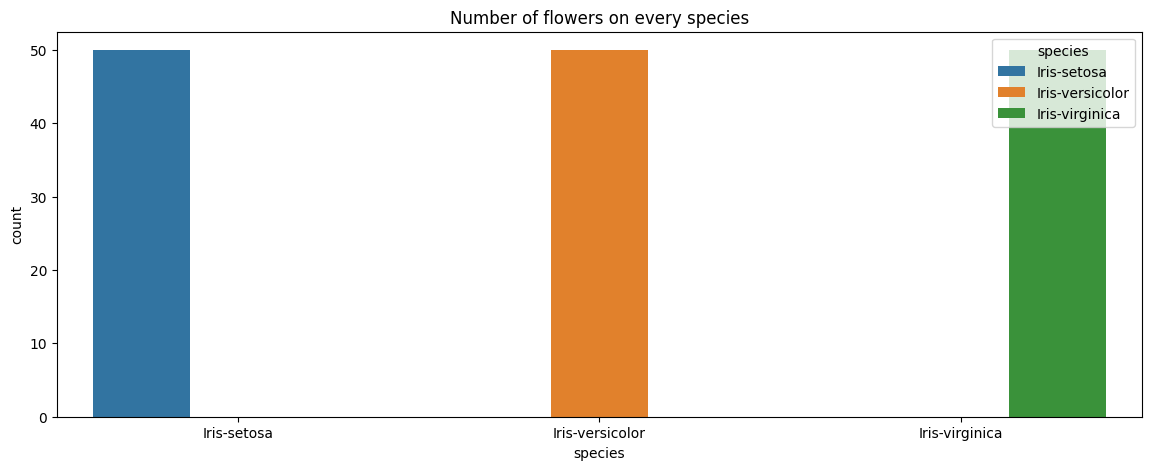

In [25]:
# group the data in species
# check the count of flower

# visual representation of the species count

fig, ax = plt.subplots(figsize=(14,5))

ax = sns.countplot(data=dataset, x='species',hue='species')
ax.set(title='Number of flowers on every species')


[Text(0.5, 1.0, 'Sepals scatterplot ')]

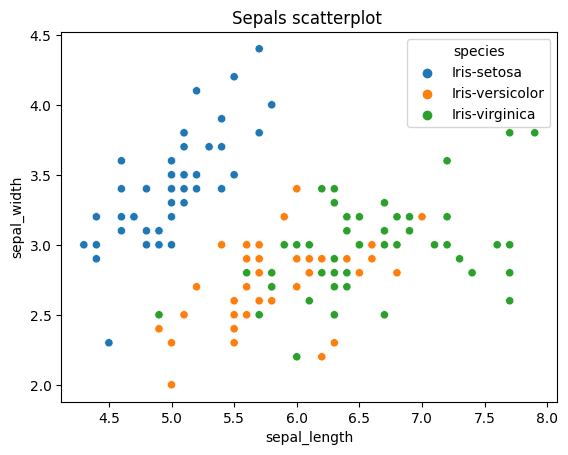

In [30]:
# plot a scatter plot with sepal length and width as the axes

fig = sns.scatterplot(dataset, x='sepal_length', y='sepal_width',hue='species')
fig.set(title='Sepals scatterplot ')

[Text(0.5, 1.0, 'Petals Scatterplot')]

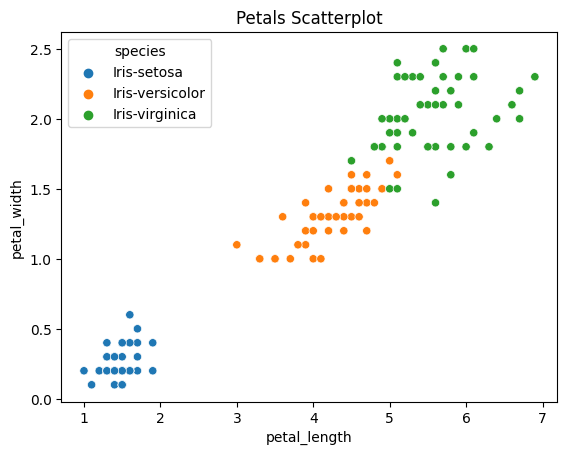

In [31]:
fig = sns.scatterplot(dataset,x='petal_length', y='petal_width', hue='species')
fig.set(title='Petals Scatterplot')

# Correlation of the features


In [41]:
# convert the species column to integer
# pandas get_dummies
dataset['species'] = dataset['species'].astype('category')
species = pd.get_dummies(dataset['species'],dtype='int')
dataset.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [44]:
new_dataset = pd.concat([dataset,species], axis=1)

In [49]:
new_dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [45]:
new_dataset.corr()

<ipython-input-45-a491ed2114aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_dataset.corr()


,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


<ipython-input-46-7a3190f81f99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_dataset.corr())


<Axes: >

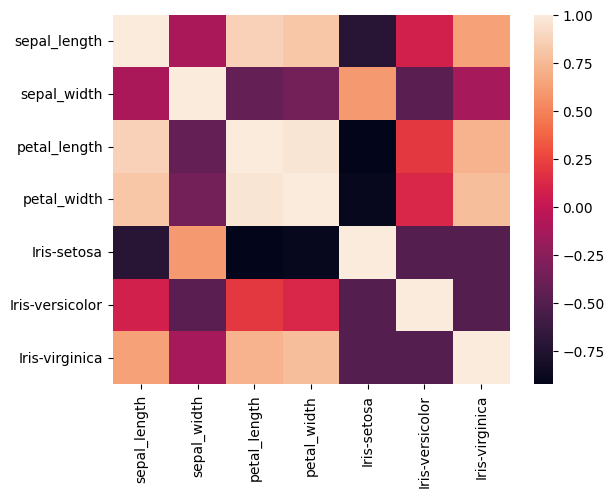

In [46]:
sns.heatmap(new_dataset.corr())

<Axes: xlabel='sepal_width', ylabel='Density'>

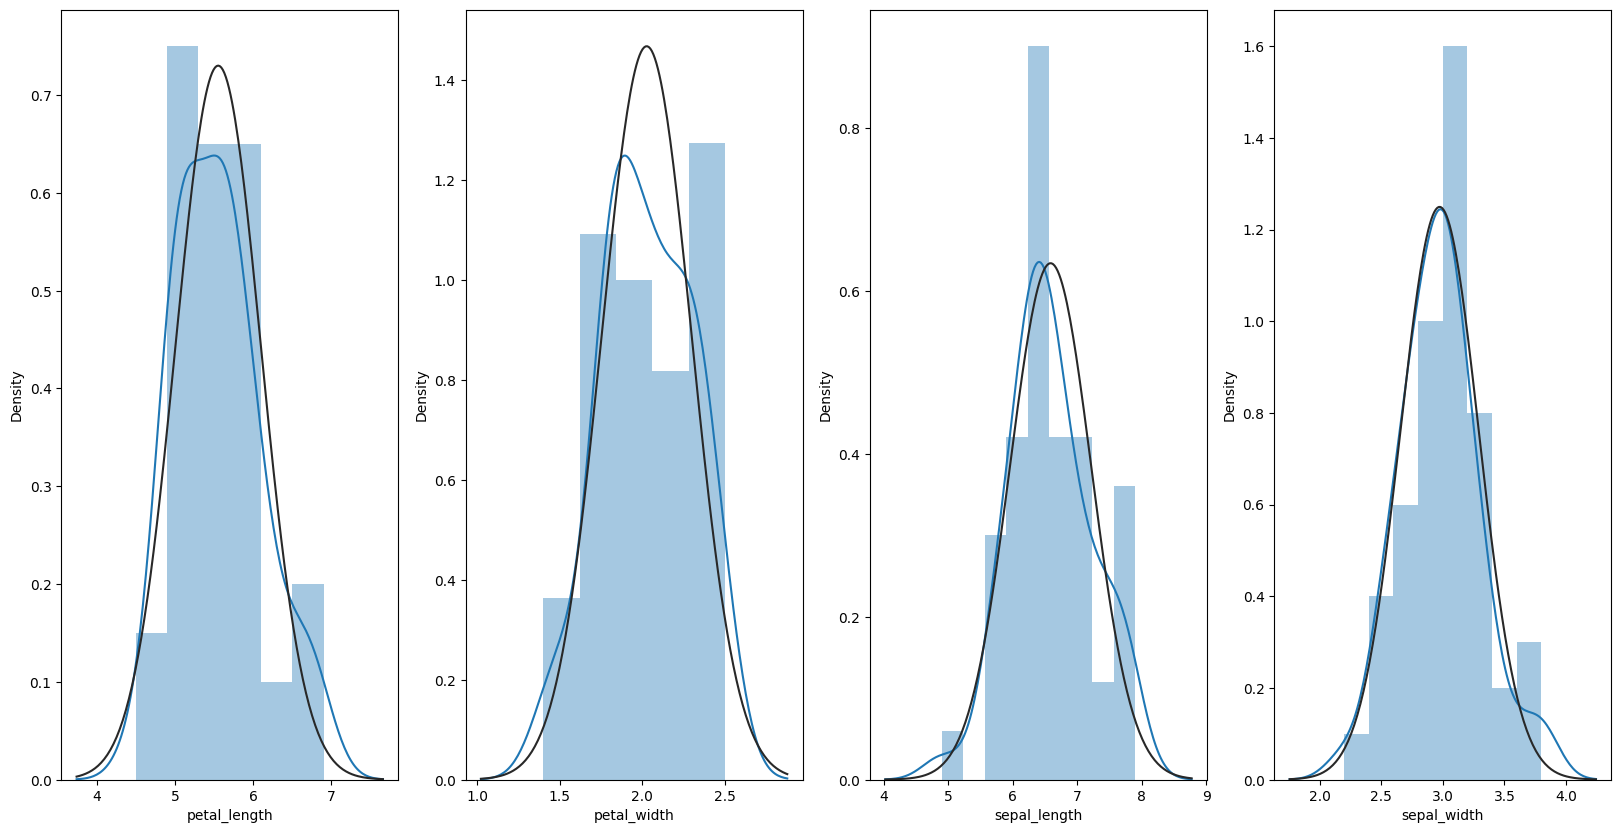

In [56]:
# create a boxplot
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1,4,figsize=(20,10))
sns.distplot(new_dataset[new_dataset['Iris-virginica'] == 1]['petal_length'], fit=norm, ax=ax[0])
sns.distplot(new_dataset[new_dataset['Iris-virginica'] == 1]['petal_width'], fit=norm, ax=ax[1])
sns.distplot(new_dataset[new_dataset['Iris-virginica'] == 1]['sepal_length'], fit=norm, ax=ax[2])
sns.distplot(new_dataset[new_dataset['Iris-virginica'] == 1]['sepal_width'], fit=norm, ax=ax[3])


<Axes: xlabel='sepal_width', ylabel='Density'>

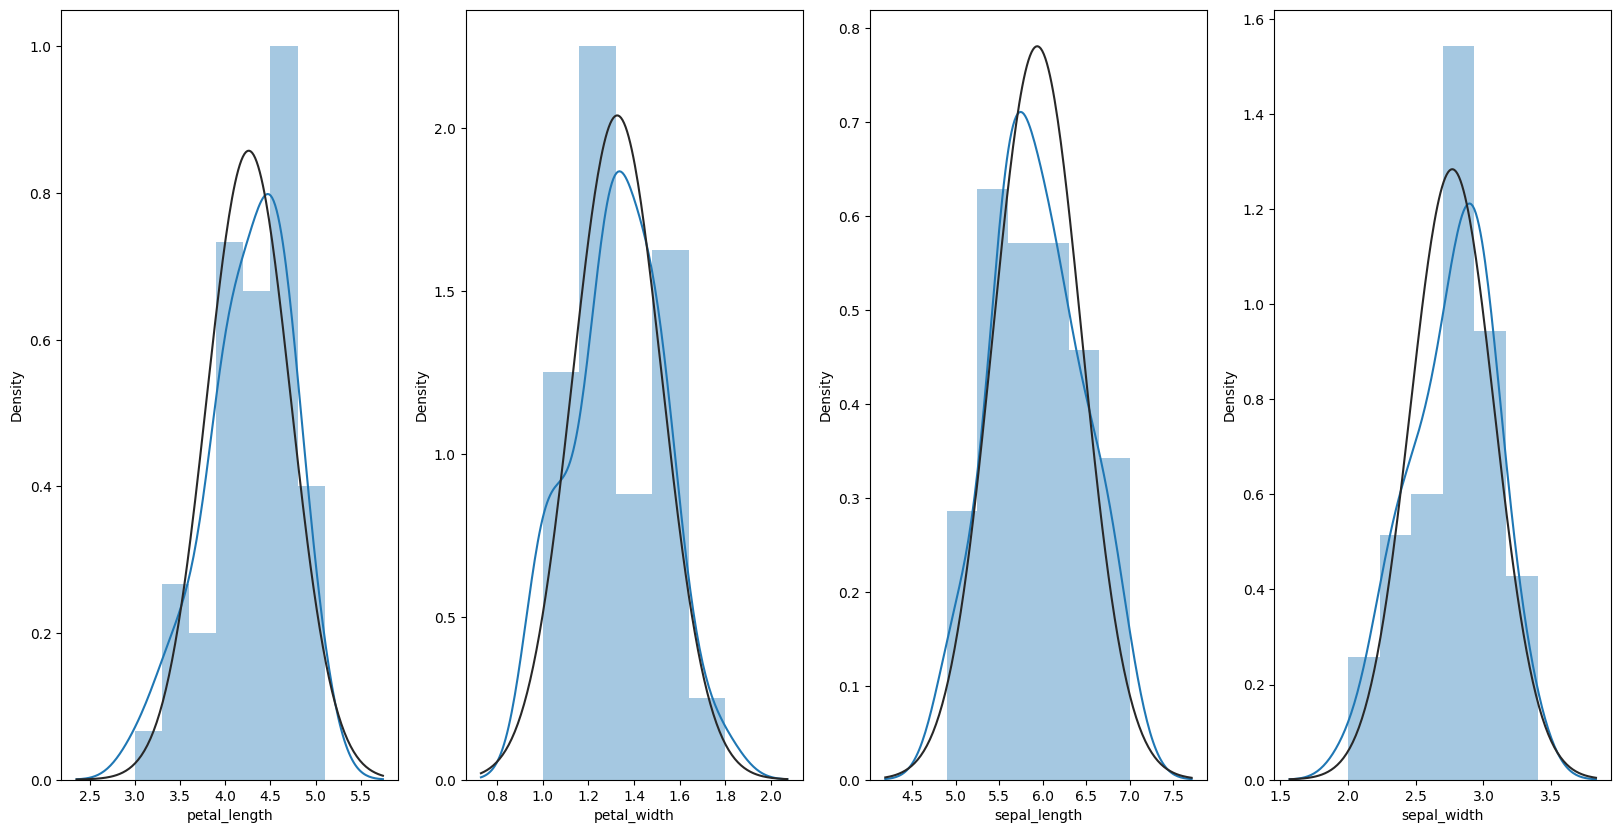

In [57]:
fig, ax = plt.subplots(1,4,figsize=(20,10))
sns.distplot(new_dataset[new_dataset['Iris-versicolor'] == 1]['petal_length'], fit=norm, ax=ax[0])
sns.distplot(new_dataset[new_dataset['Iris-versicolor'] == 1]['petal_width'], fit=norm, ax=ax[1])
sns.distplot(new_dataset[new_dataset['Iris-versicolor'] == 1]['sepal_length'], fit=norm, ax=ax[2])
sns.distplot(new_dataset[new_dataset['Iris-versicolor'] == 1]['sepal_width'], fit=norm, ax=ax[3])

# Preprocessing

In [68]:
new_dataset.duplicated().any()

True

In [69]:
new_dataset = new_dataset.drop_duplicates()

In [70]:
new_dataset.duplicated().any()

False

In [71]:
new_dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0,1
146,6.3,2.5,5.0,1.9,Iris-virginica,0,0,1
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0,1
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0,1


In [75]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
new_dataset['species'] = enc.fit_transform(new_dataset['species'])

In [76]:
new_dataset

,sepal_length,sepal_width,petal_length,petal_width,species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0,1
146,6.3,2.5,5.0,1.9,2,0,0,1
147,6.5,3.0,5.2,2.0,2,0,0,1
148,6.2,3.4,5.4,2.3,2,0,0,1


# Model Training

In [86]:
# split the code to training and test dataset
X = new_dataset[new_dataset.columns[:-4]]
y = new_dataset['species']

In [85]:
X

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


In [87]:
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

LogisticRegression

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [96]:
y_predict = classifier.predict(X_test)
# model accuracy
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.91      1.00      0.95        10
           2       1.00      0.80      0.89         5

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30

[[15  0  0]
 [ 0 10  0]
 [ 0  1  4]]


In [104]:
classifier_representation = tree.export_text(classifier)
print(classifier_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [97]:
from sklearn.svm import SVC
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [98]:
y_predict = classifier.predict(X_test)
# model accuracy
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.90      0.90      0.90        10
           2       0.80      0.80      0.80         5

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30

[[15  0  0]
 [ 0  9  1]
 [ 0  1  4]]


In [102]:
# Text representation of the Model

classifier_representation = tree.export_text(classifier)
print(classifier_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



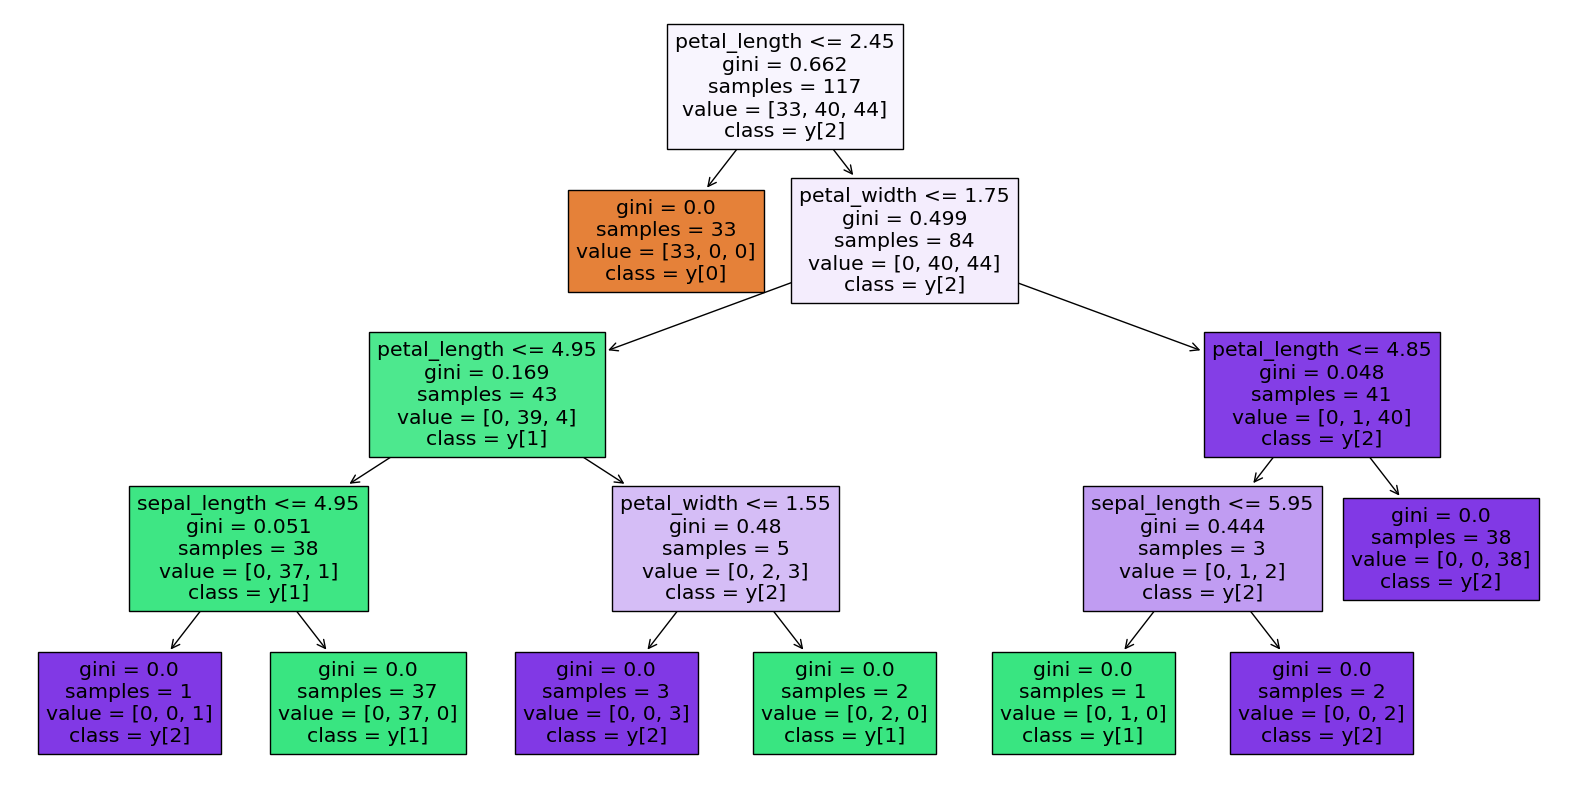

In [115]:
# plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, feature_names=new_dataset.columns,filled=True,class_names=True)
plt.show()